In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def  loss_function(weight, x, y):
    m = len(y)

    predicted_values = np.dot(x, weight)
    loss = (1 / (2 * m)) * np.sum((predicted_values - y) ** 2)
    return loss

In [45]:

def gradient_descent(x ,y, weight, alpha=0.01, iterations=100, tolerance=0.01):
    m = len(y)
    loss_history = np.zeros(iterations)
    weight_history = np.zeros((iterations, 2))

    for iteration in range(iterations):
        prediction = np.dot(x, weight)
        old_weight = weight
        weight = old_weight - (alpha / m) * np.dot(x.T, prediction - y)

        weight_history[iteration, :] = weight.T
        loss_history[iteration]  = loss_function(weight, x, y)

        if all([np.abs(old_weight[0][0] - weight[0][0]) <= tolerance,
                np.abs(old_weight[1][0] - weight[1][0]) <= tolerance]):
            print(f"Stopped at {iteration} iteration")
            loss_history = loss_history[np.where(loss_history != 0)]
            weight_history = weight_history[np.where(weight_history != 0)]
            break

    return weight, loss_history, weight_history

In [46]:
def draw_task(x, y, iterations, alpha, tolerance, axes, color):
    axes.plot(x, y, f'{color}.')

    weight = np.random.randn(2, 1)
    print(f"Initial w0 = {weight[0][0]}\tw1 = {weight[1][0]}")

    X = np.c_[np.ones((len(x), 1)), x]
    weight, loss_history, weight_history = gradient_descent(
        X, y, weight, iterations=iterations, alpha=alpha, tolerance=tolerance
    )

    _ = axes.plot(x, np.dot(X, weight), 'r-')
    print(f'Final w0 = {weight[0][0]}\tw1 = {weight[1][0]}')
    print(f'Final loss/MSE:\t{loss_history[-1]}')

In [47]:
def draw_general(x1, y1, x2, y2, iterations, alpha, tolerance, axes):
    axes.plot(x1, y1, 'k.')
    axes.plot(x2, y2, 'g.')
    _ = axes.axis([-0.01, 1.01, 19, 23])

    x = np.concatenate((x1, x2))
    y = np.concatenate((y1, y2))

    weight = np.random.randn(2, 1)
    print(f"Initial w0 = {weight[0][0]}\tw1 = {weight[1][0]}")

    X = np.c_[np.ones((len(x), 1)), x]
    weight, loss_history, weight_history = gradient_descent(
        X, y, weight, iterations=iterations, alpha=alpha, tolerance=tolerance
    )

    _ = axes.plot(x, np.dot(X, weight), 'r-')
    print(f'Final w0 = {weight[0][0]}\tw1 = {weight[1][0]}')
    print(f'Final loss/MSE:\t{loss_history[-1]}')

In [48]:
def main():
    alpha = 0.01
    tolerance = 0.001
    iterations = 10000

    data_train = np.genfromtxt('lab_1_train.csv', delimiter=',')[1:]
    x_train = data_train[:, [1]]
    y_train = data_train[:, [2]]

    data_test = np.genfromtxt('lab_1_test.csv', delimiter=',')[1:]
    x_test = data_test[:, [1]]
    y_test = data_test[:, [2]]

    fig, axes = plt.subplots(3)
    plt.subplots_adjust(hspace=1)
    fig.set_figheight(15)
    fig.set_figwidth(15)

    axes[0].set_title("train.csv")
    axes[0].axis([-0.01, 0.61, 17.5, 23])
    axes[1].set_title("test.csv")
    axes[1].axis([0.6, 1.01, 19, 25])
    axes[2].set_title("combined data")
    for ax in axes.flat:
        ax.set(xlabel='x', ylabel='y')

    print('=' * 20, 'train.csv', '=' * 20)
    draw_task(x_train, y_train, iterations, alpha, tolerance, axes[0], 'k')
    print('\n', '=' * 20, 'test.csv', '=' * 20)
    draw_task(x_test, y_test, iterations, alpha, tolerance, axes[1], 'g')
    print('\n', '=' * 20, 'combined data', '=' * 20, )
    draw_general(x_train, y_train, x_test, y_test,
                 iterations, alpha, tolerance, axes[2])

==================== train.csv ====================
Initial w0 = 2.677747497522534	w1 = -0.02485256779444846
Stopped at 496 iteration
Final w0 = 19.086743454226447	w1 = 4.577123369959755
Final loss/MSE:	0.1447089870010578

 ==================== test.csv ====================
Initial w0 = -1.113780984764034	w1 = 0.34094676953851355
Stopped at 382 iteration
Final w0 = 12.659435733537094	w1 = 11.007130510195577
Final loss/MSE:	0.609076767184916

 ==================== combined data ====================
Initial w0 = -1.3230935463996845	w1 = -0.6846955831310181
Stopped at 2249 iteration
Final w0 = 19.149669649592553	w1 = 3.5312762053142897
Final loss/MSE:	0.13246370153754286


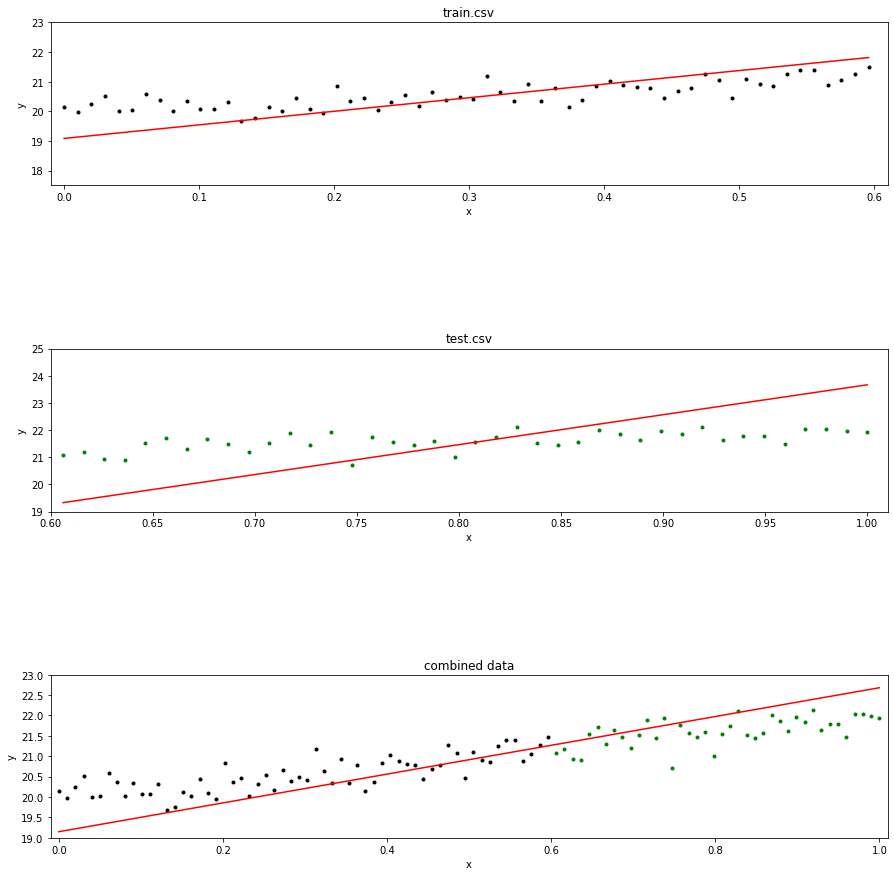

In [49]:
main()